In [1]:
# prova a fare con keras e tf
import numpy as np
import pandas as pd
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(font_scale=1.2)
sns.set_style('whitegrid')
#%matplotlib inline

## TODOs
- [x] bisogna uniformare le features e levare gli outliers + palesi (qli dal chisq nel Wmunu)
- [x] prima li visualizziamo separatamente e droppiamo le colonne che nn ci interessano (dopo aver visto che sono scorrelate con la heatmap)
- [x] mischiamo tutto e controlliamo la popolosità (anche se mi aspetto che ci siano casini a riguardo, ma chissene)
domandone, ci interessa solo se le correlazioni sono lineari? o perlomeno dobbiamo stare attenti solo a quei casi?
- [ ] controllare la feature engineering
- [ ] costruire modelli e giocare con i parametri

**Riflessioni**
Se la dipendenza nn fosse banalmente lineare ma metti quadratica (ie cmq 1 relazione semplice da scovare) nn sarebbe cmq ridondante fornire entrambe le feature per l'allenamento?
forse è per questo che nn facciamo solo la heatmap ma anche il pairplot… -> per fare 1 cosa veloce facciamo solo la heatmap, per andare a cercare cose + fini (per qnto si faccia tutto ad occhio :) daje di pairplot -> in qst'ottica ha senso fare i pairplot separatamente (nel sense che nn ci interessa necessariamente vederli insieme) così nn ci mette 5 minuti ad eseguire per i dati merged

# Features W -> e + nu
Run number of the event, Event number, pt eta phi sono la cinematica dl'e, Q ne è la carica, type è dove hanno trovato l'e (se barrel o endcap del rivelatore), i del e il sigmaEtaEta si riferiscono tutti al cluster associato alla rilevazione dl'e, HoverE, tutti gli iso sono associati alla rivelazione dl'e, mentre i MET sono la cinematica dl nu

In [2]:
df_enu = pd.read_csv('~/Documents/tesi/thesis_notebooks/input_datasets/Wenu.csv')
df_enu['type'] = df_enu['type'].map({'EB': 0, 'EE': 1})

In [56]:
df_enu.info()
df_enu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Run          100000 non-null  int64  
 1   Event        100000 non-null  int64  
 2   pt           100000 non-null  float64
 3   eta          100000 non-null  float64
 4   phi          100000 non-null  float64
 5   Q            100000 non-null  int64  
 6   type         100000 non-null  object 
 7   delEta       100000 non-null  int64  
 8   delPhi       100000 non-null  int64  
 9   sigmaEtaEta  100000 non-null  float64
 10  HoverE       100000 non-null  float64
 11  isoTrack     100000 non-null  float64
 12  isoEcal      100000 non-null  float64
 13  isoHcal      100000 non-null  float64
 14  MET          100000 non-null  float64
 15  phiMET       100000 non-null  float64
dtypes: float64(10), int64(5), object(1)
memory usage: 12.2+ MB


Run      Event       pt     eta     phi  Q type  delEta  delPhi  \
0  167676  328843401  38.6387 -0.8499  1.8486 -1   EB       0       0   
1  167676  328836311  59.1666 -2.1095 -2.5163  1   EE       0       0   
2  167676  328915343  31.7262  2.4504  2.8956  1   EE       0       0   
3  167676  328884653  73.4109 -1.3951  2.0052 -1   EB       0       0   
4  167676  328970109  49.1363 -2.4326  3.0219  1   EE       0       0   

   sigmaEtaEta  HoverE  isoTrack  isoEcal  isoHcal      MET  phiMET  
0       0.0095  0.0000    0.0000   1.2241   0.0000  46.7884 -1.3886  
1       0.0214  0.0177   20.4771   2.5441   6.7450  15.0179  1.1503  
2       0.0288  0.0000    0.7775   1.8222   0.3663  20.6550 -0.2703  
3       0.0100  0.0000   22.8584   8.0151   8.2951   3.2858 -0.7739  
4       0.0271  0.0000    0.0000   0.1154   0.0000   3.1425  2.5081

In [3]:
# to uniform datasets (could be wrong, I need more info on the datasets)
df_enu['iso'] = df_enu.apply(lambda x: x['isoTrack'] + x['isoEcal'] + x['isoHcal'],axis=1)
# df_enu.head(3)

In [4]:
# Adding class because of future merging of datasets
df_enu['class'] = df_enu['pt'].apply(lambda x: 'enu')
df_e = df_enu[['pt','eta','phi','Q','iso','MET','phiMET','class']]

In [5]:
del df_enu

## Data visualization, W -> e + nu

<Axes: >

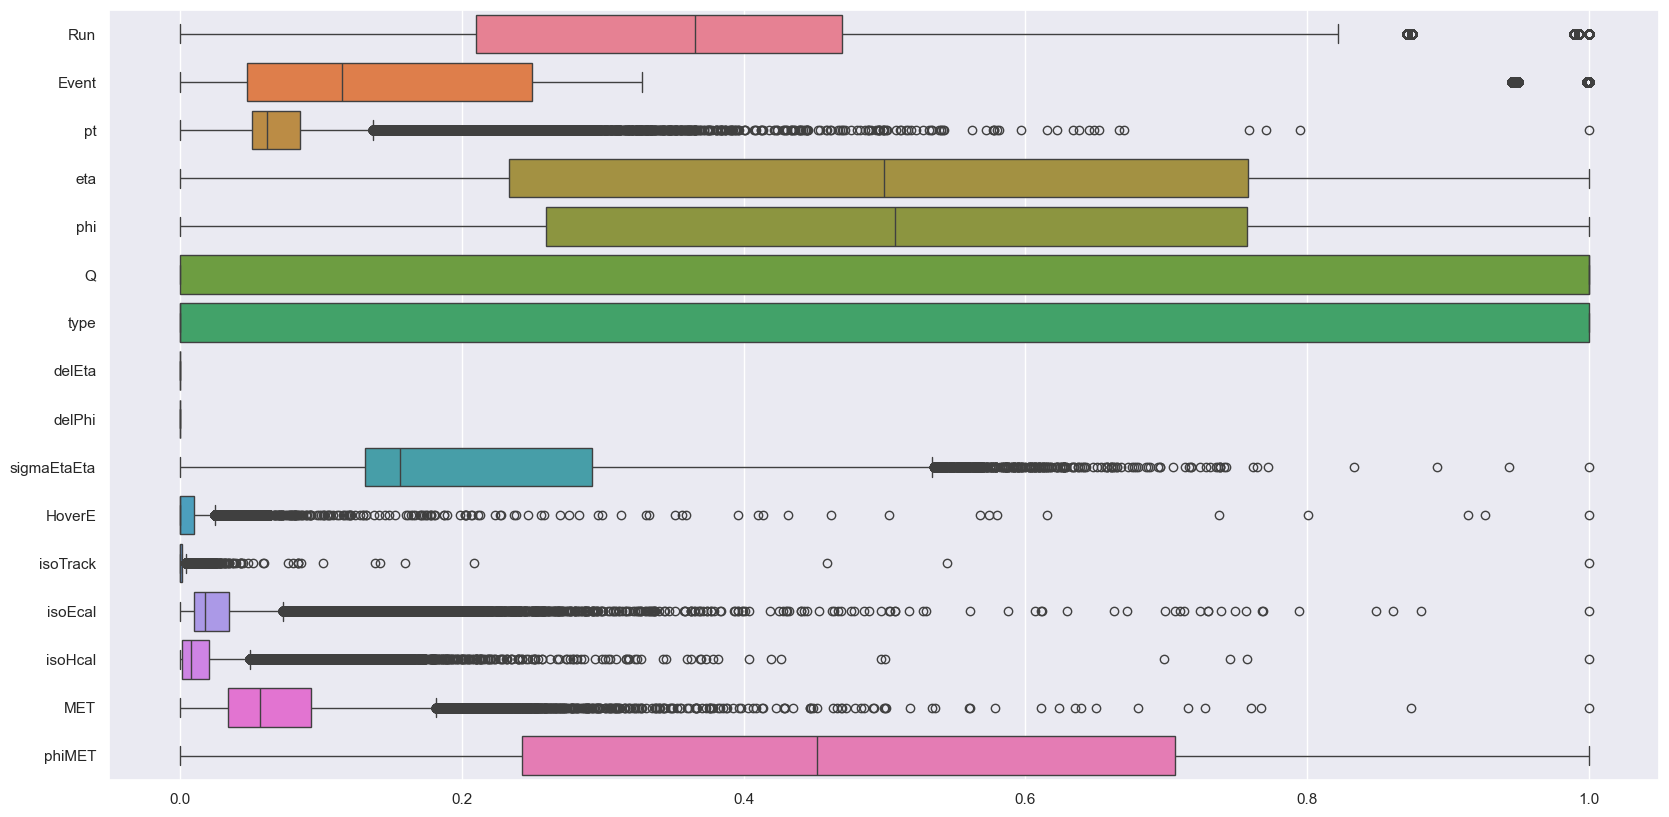

In [69]:
scaler = preprocessing.MinMaxScaler()
df_enu_scaled = scaler.fit_transform(df_enu)
dfenu_array_to_dfenu = pd.DataFrame(df_enu_scaled, columns = df_enu.columns)
# aesthetics
plt.figure(figsize=(20, 10)) 
sns.set(font_scale=1.0)
# boxplot
sns.boxplot(data=dfenu_array_to_dfenu, orient="h")

**Boxplot comment**: pt e MET sono gli unici che presentano outliers tra le feature che mi interessano

<Axes: >

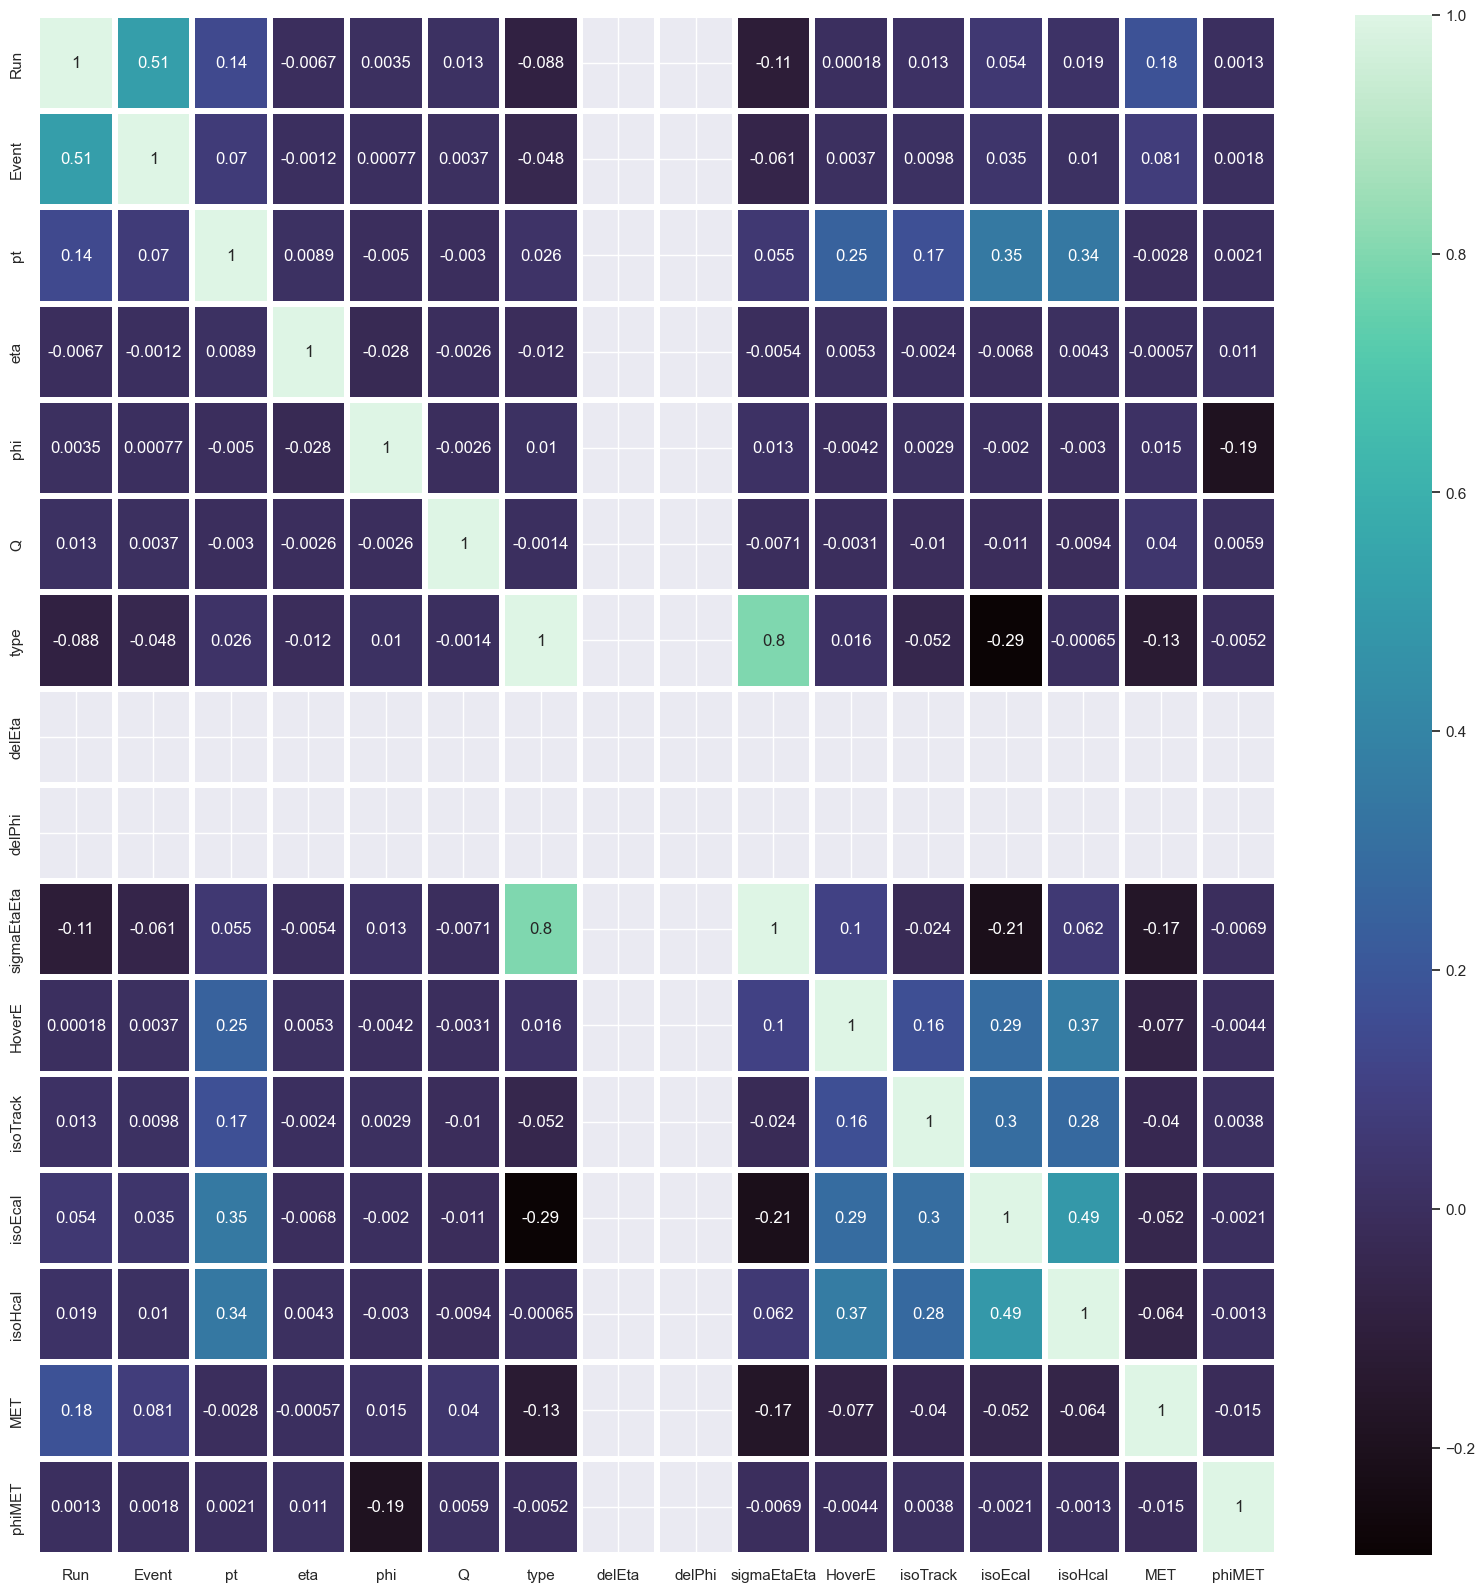

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
# sns.set(font_scale=1.0)
sns.heatmap(df_enu.corr() , annot= True, linewidths=3, ax=ax, cmap='mako')

**Heatmap comment**: Cosa vedo qua? in realtà nn credo molto… perché sono tutti poco correlati (domina questo blu/nero che però nn corrisponde a grandi correlazioni) e quelle poche che invece danno correlazioni maggiori tirano in ballo features che non interessano alla mia analisi. Però ricorda che questa è la correlazione (credo di Pearson), ma cosa ci permette di vedere questa variabile?

<Figure size 2000x1000 with 0 Axes>

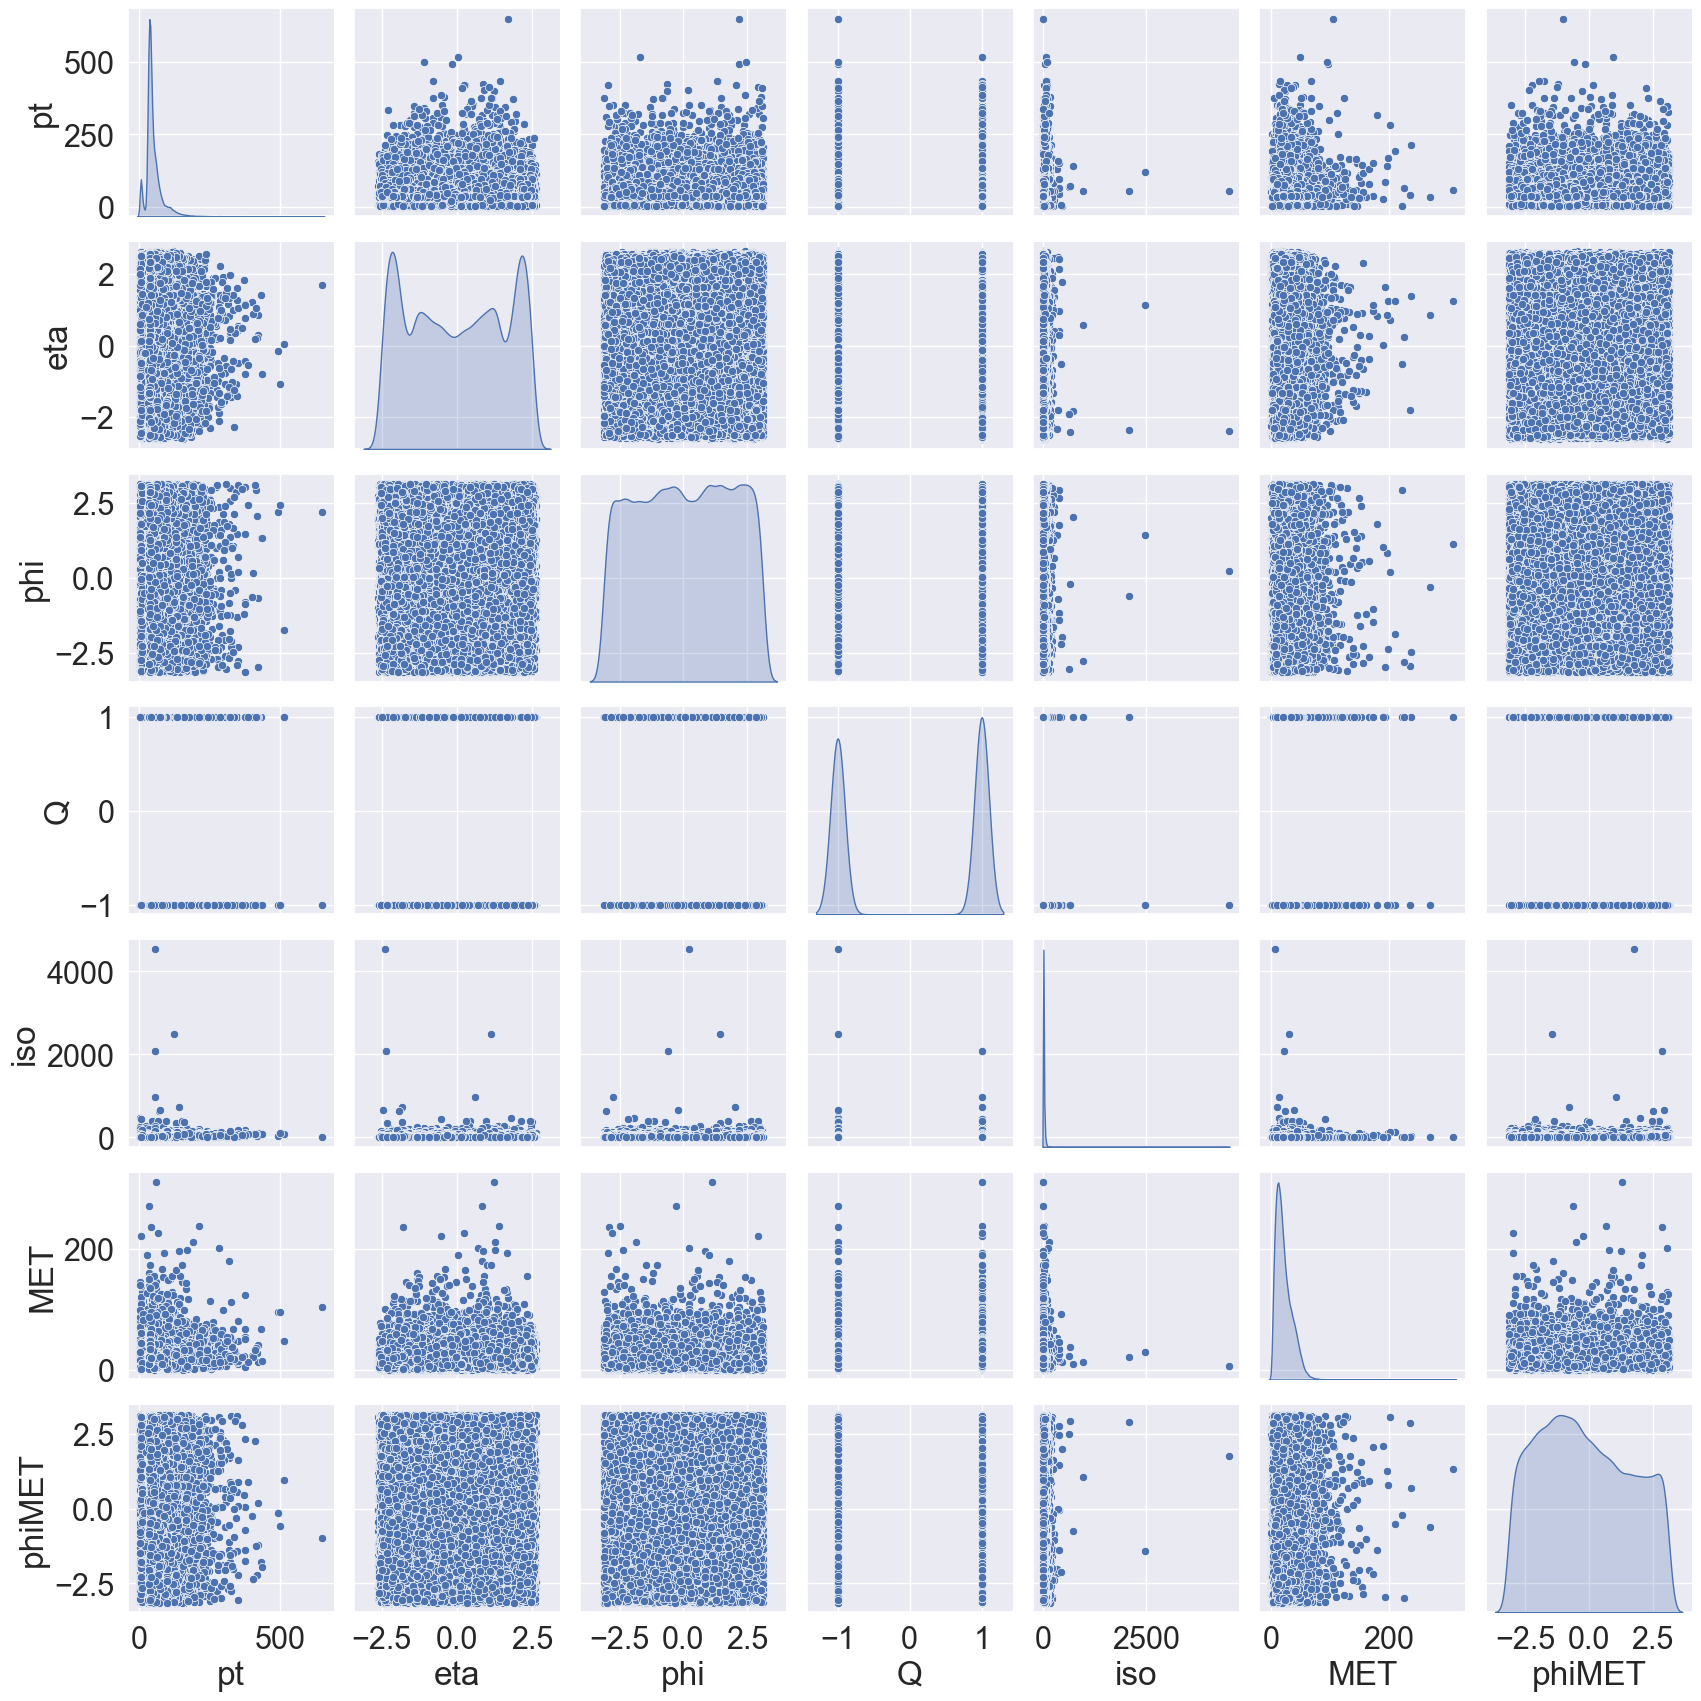

In [34]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df_e, diag_kind='kde')

**Pairplot comment**: nn ci sono dipendenze palesi, si può procedere

<Figure size 2000x1000 with 0 Axes>

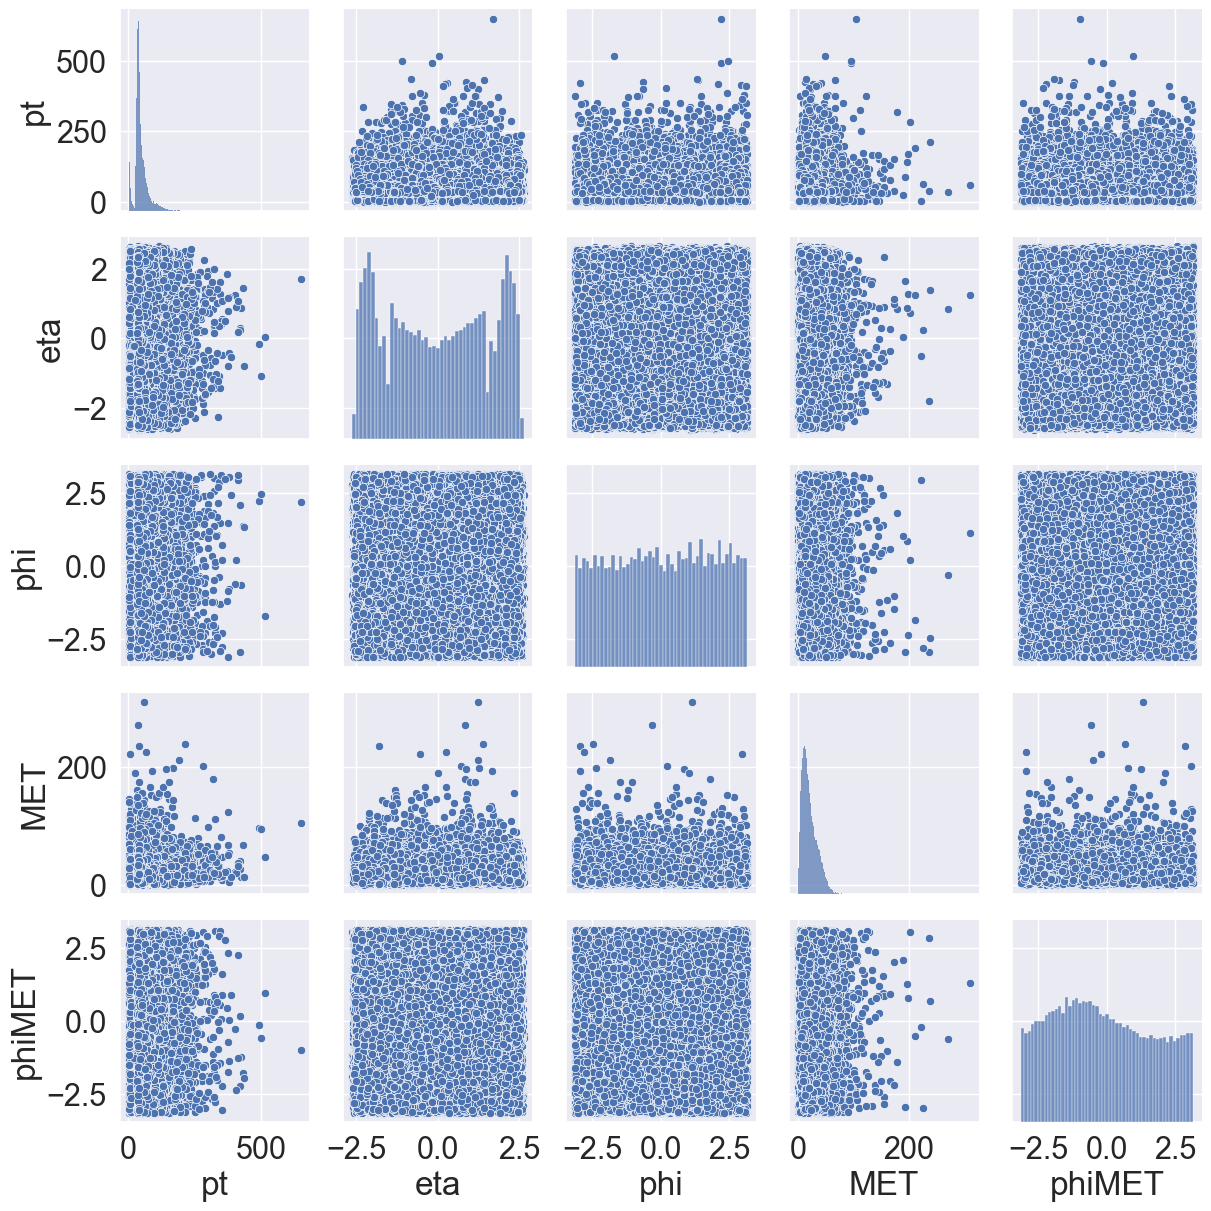

In [10]:
# aesthetics
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
# draw pairplot
sns.pairplot(df, hue="class", palette="deep")

<Axes: >

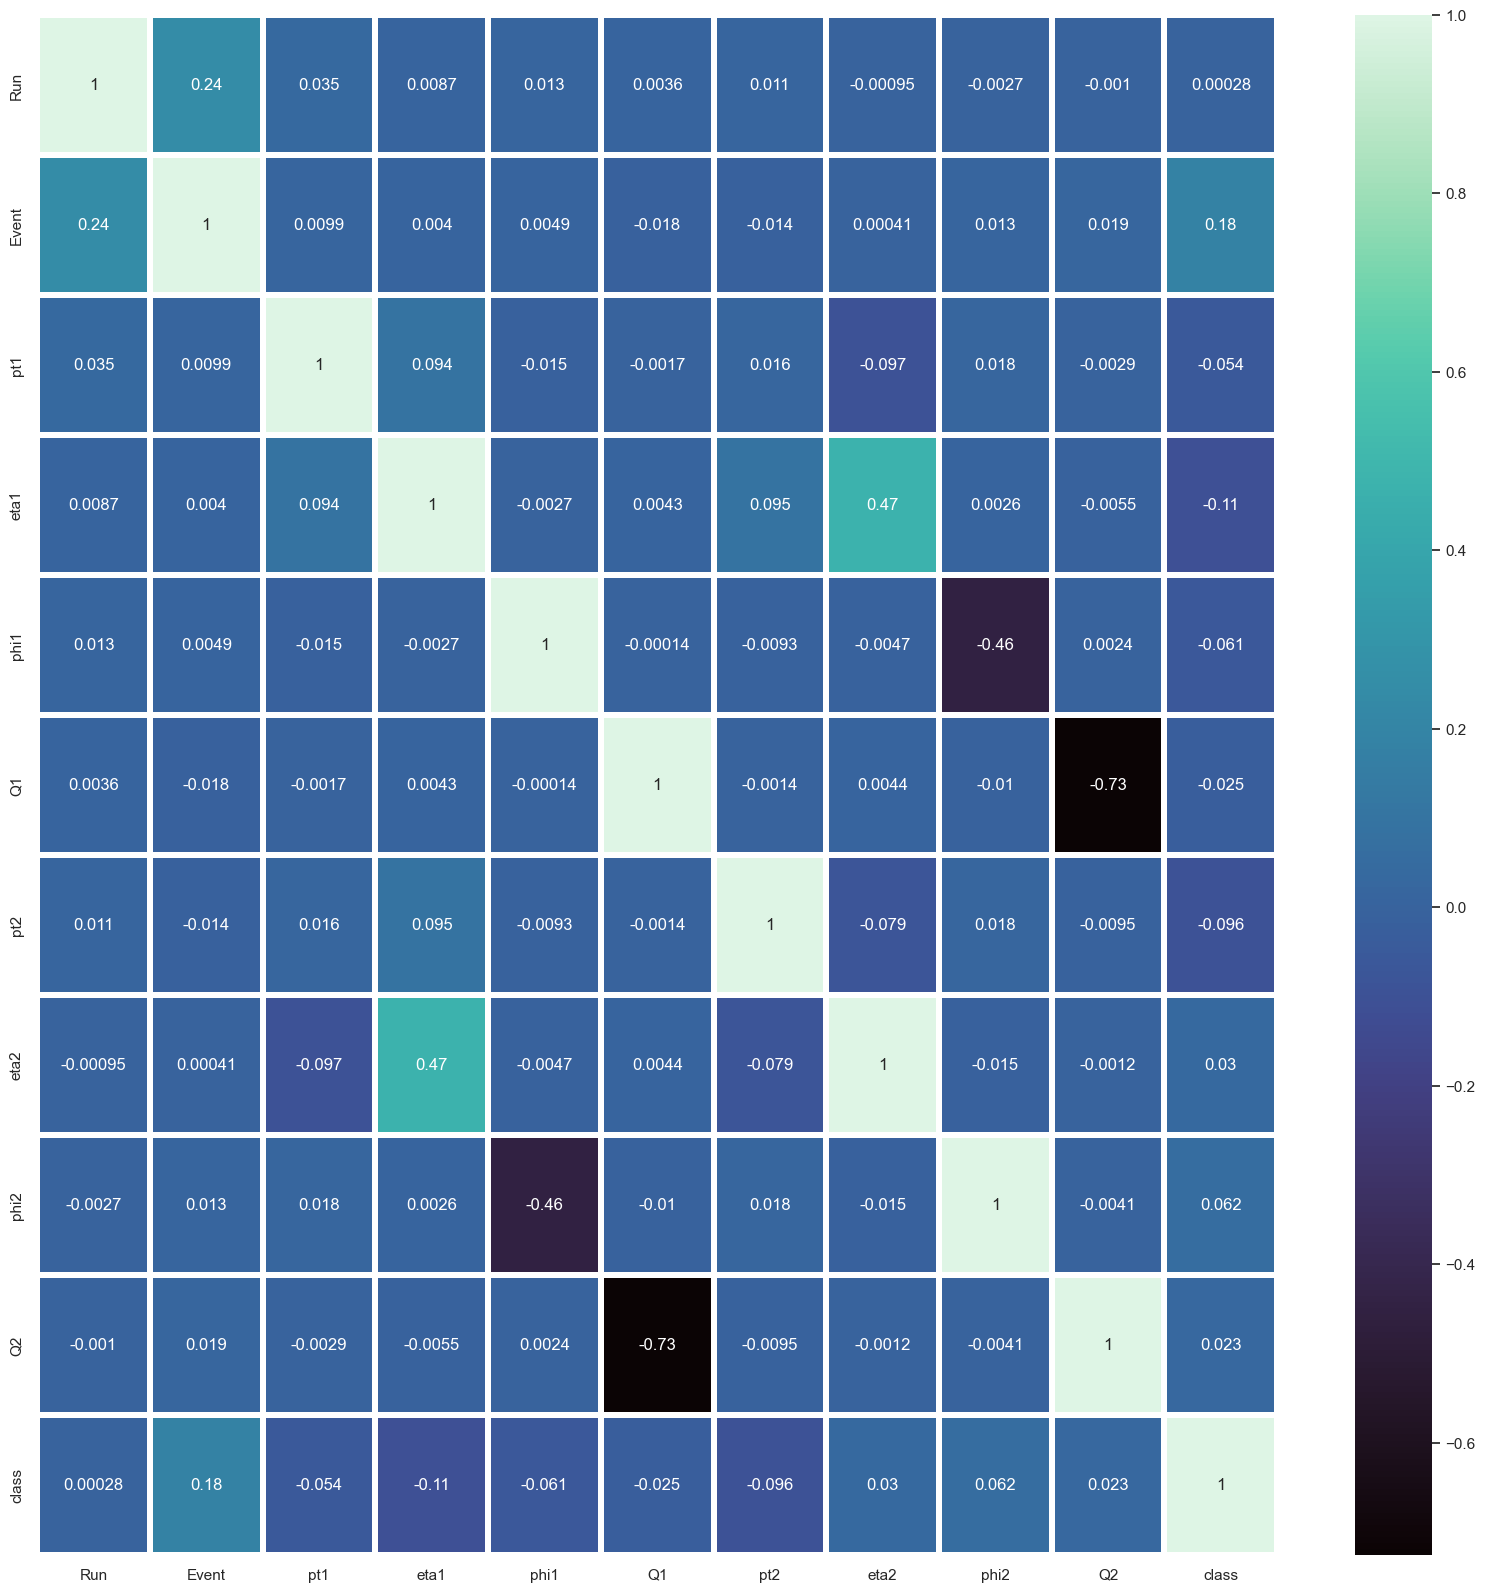

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax, cmap='mako')

Da qua vedo che eta-phi, eta-phiMET e phi-phiMET nn mostrano dipendenze considerevoli mentre le altre combinazioni mostrano che ci sono delle dipendenze
anche se devo ammettere

# Features W -> mu + nu
chisq è pké (tra l'altro credo sia ridotto) qste ricostruzioni arrivano da dei fit, chi quadri troppo alti sono evidentemente sospetti, dxy è il parametro d'impatto dl'evento, iso riguarda il parametro con cui si decreta di aver o meno misurato un mu

In [6]:
df_munu = pd.read_csv('~/Documents/tesi/thesis_notebooks/input_datasets/Wmunu.csv')

In [62]:
df_munu.info()
df_munu.sample(3)

<class 'pandas.core.frame.DataFrame'>
Index: 97945 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     97945 non-null  int64  
 1   Event   97945 non-null  int64  
 2   pt      97945 non-null  float64
 3   eta     97945 non-null  float64
 4   phi     97945 non-null  float64
 5   Q       97945 non-null  int64  
 6   chiSq   97945 non-null  float64
 7   dxy     97945 non-null  float64
 8   iso     97945 non-null  float64
 9   MET     97945 non-null  float64
 10  phiMET  97945 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 9.0 MB


Run       Event       pt     eta     phi  Q   chiSq     dxy  \
90696  172024    18474784  32.7204 -1.7551  2.3196 -1  0.9396 -0.0838   
61221  166408    51367781  40.6453 -0.8815 -1.7703  1  1.0531  0.0715   
7361   172822  1753605756  30.4387 -0.7218  0.5161 -1  0.7691 -0.0043   

           iso      MET  phiMET  
90696   0.5602  25.3223 -1.0785  
61221  51.8983  15.5309 -2.5433  
7361   11.1053  16.0327 -0.3415

Sbarazziamoci degli eventi inaffidabili, con chiSq troppo alto

In [7]:
chisq_th = 10 # threshold for acceptance of the data. It is a reduced chi squared!
not_trustworthy = df_munu[df_munu['chiSq'] > chisq_th]
len(not_trustworthy)

4802

In [8]:
df_munu.drop(not_trustworthy.index, inplace=True)
# print(len(df_munu[df_munu['chiSq']>100]))

# again to merge dataset in future
df_munu['class'] = df_munu['pt'].apply(lambda x: 'munu')
df_mu = df_munu[['pt','eta','phi','Q','iso','MET','phiMET','class']]

In [9]:
del df_munu

## Data visualization, W -> mu + nu

<Axes: >

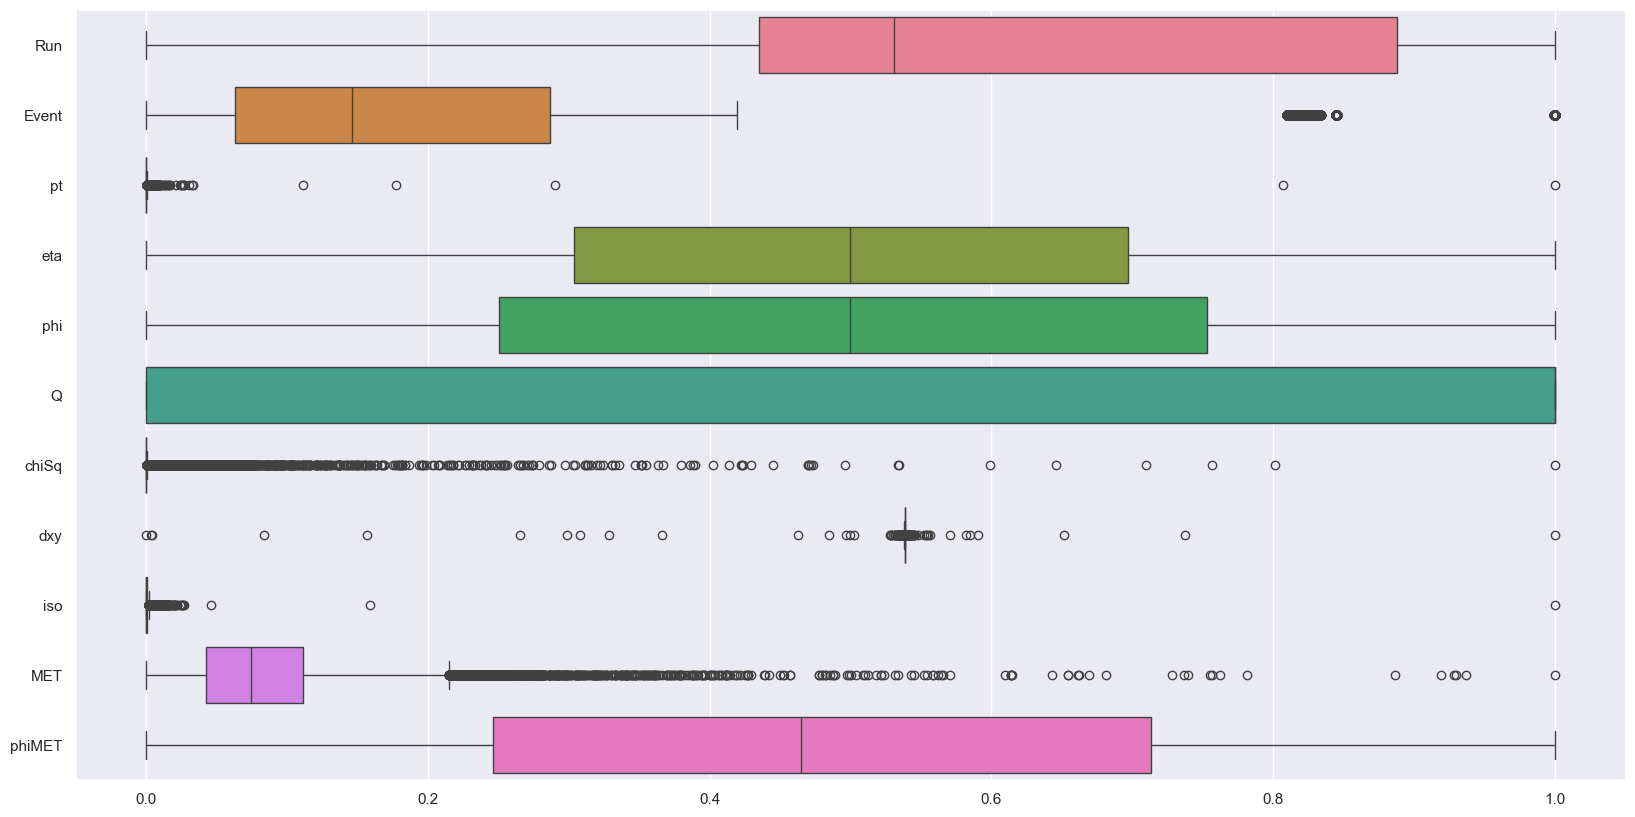

In [43]:
df_munu_scaled = scaler.fit_transform(df_munu)
dfmunu_array_to_dfmunu = pd.DataFrame(df_munu_scaled, columns = df_munu.columns)
# aesthetics
plt.figure(figsize=(20, 10)) 
sns.set(font_scale=1.0)
# boxplot
sns.boxplot(data=dfmunu_array_to_dfmunu, orient="h")

Di nuovo pt e MET sono quelli con outliers (tra le features che mi interessano). Per il chi quadro devo scegliere una soglia, come se stessi facendo un test statistico (per quanto non possa essere ben fatto dal momente che nn ho la minima idea dei gradi di libertà della cosa)

<Axes: >

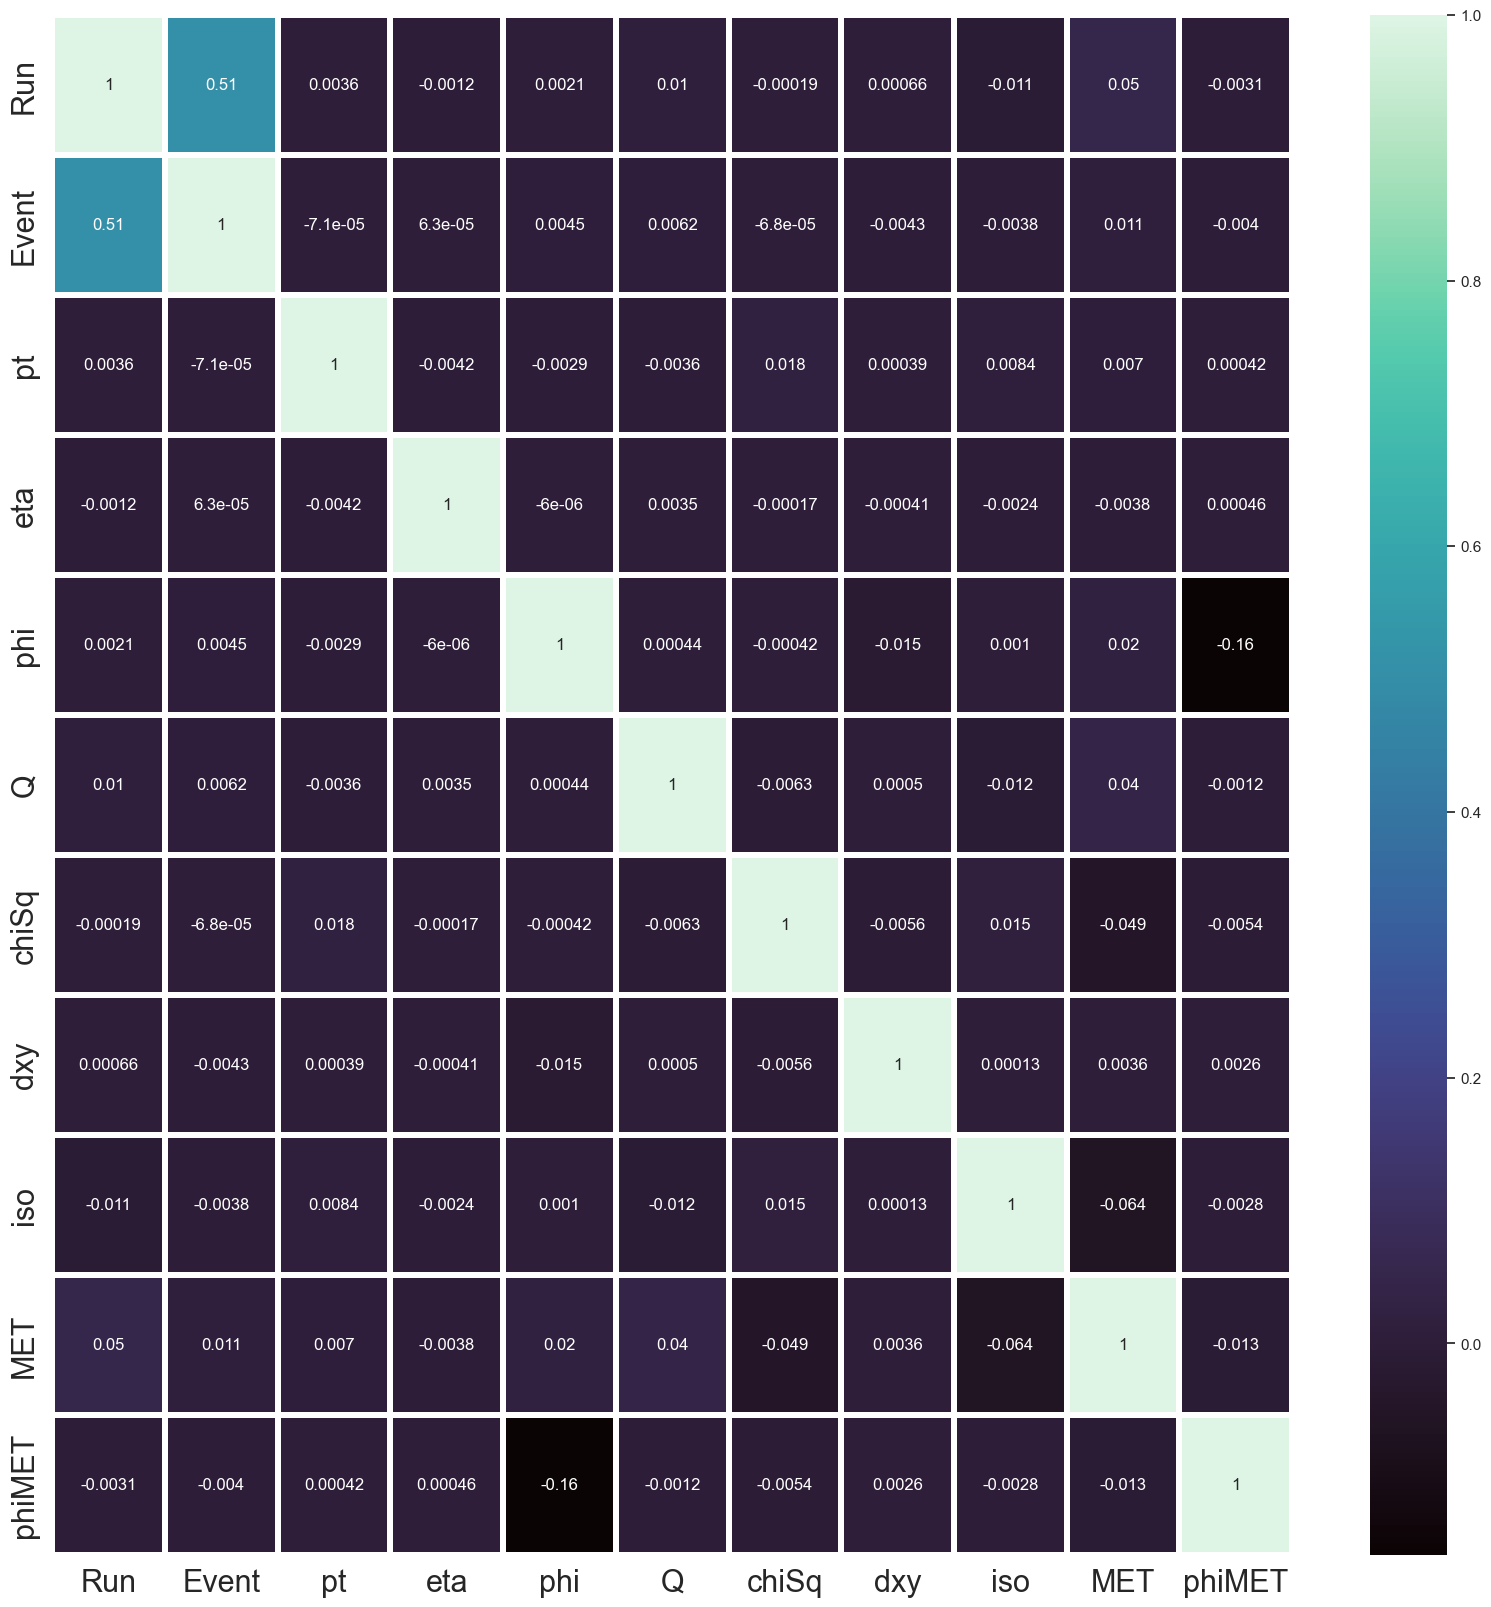

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=1.0)
sns.heatmap(df_munu.corr() , annot= True, linewidths=3, ax=ax, cmap='mako')

Stesso discorso di prima, non si osservano correlazioni (lineari!) evidenti tra le feature

<Figure size 2000x1000 with 0 Axes>

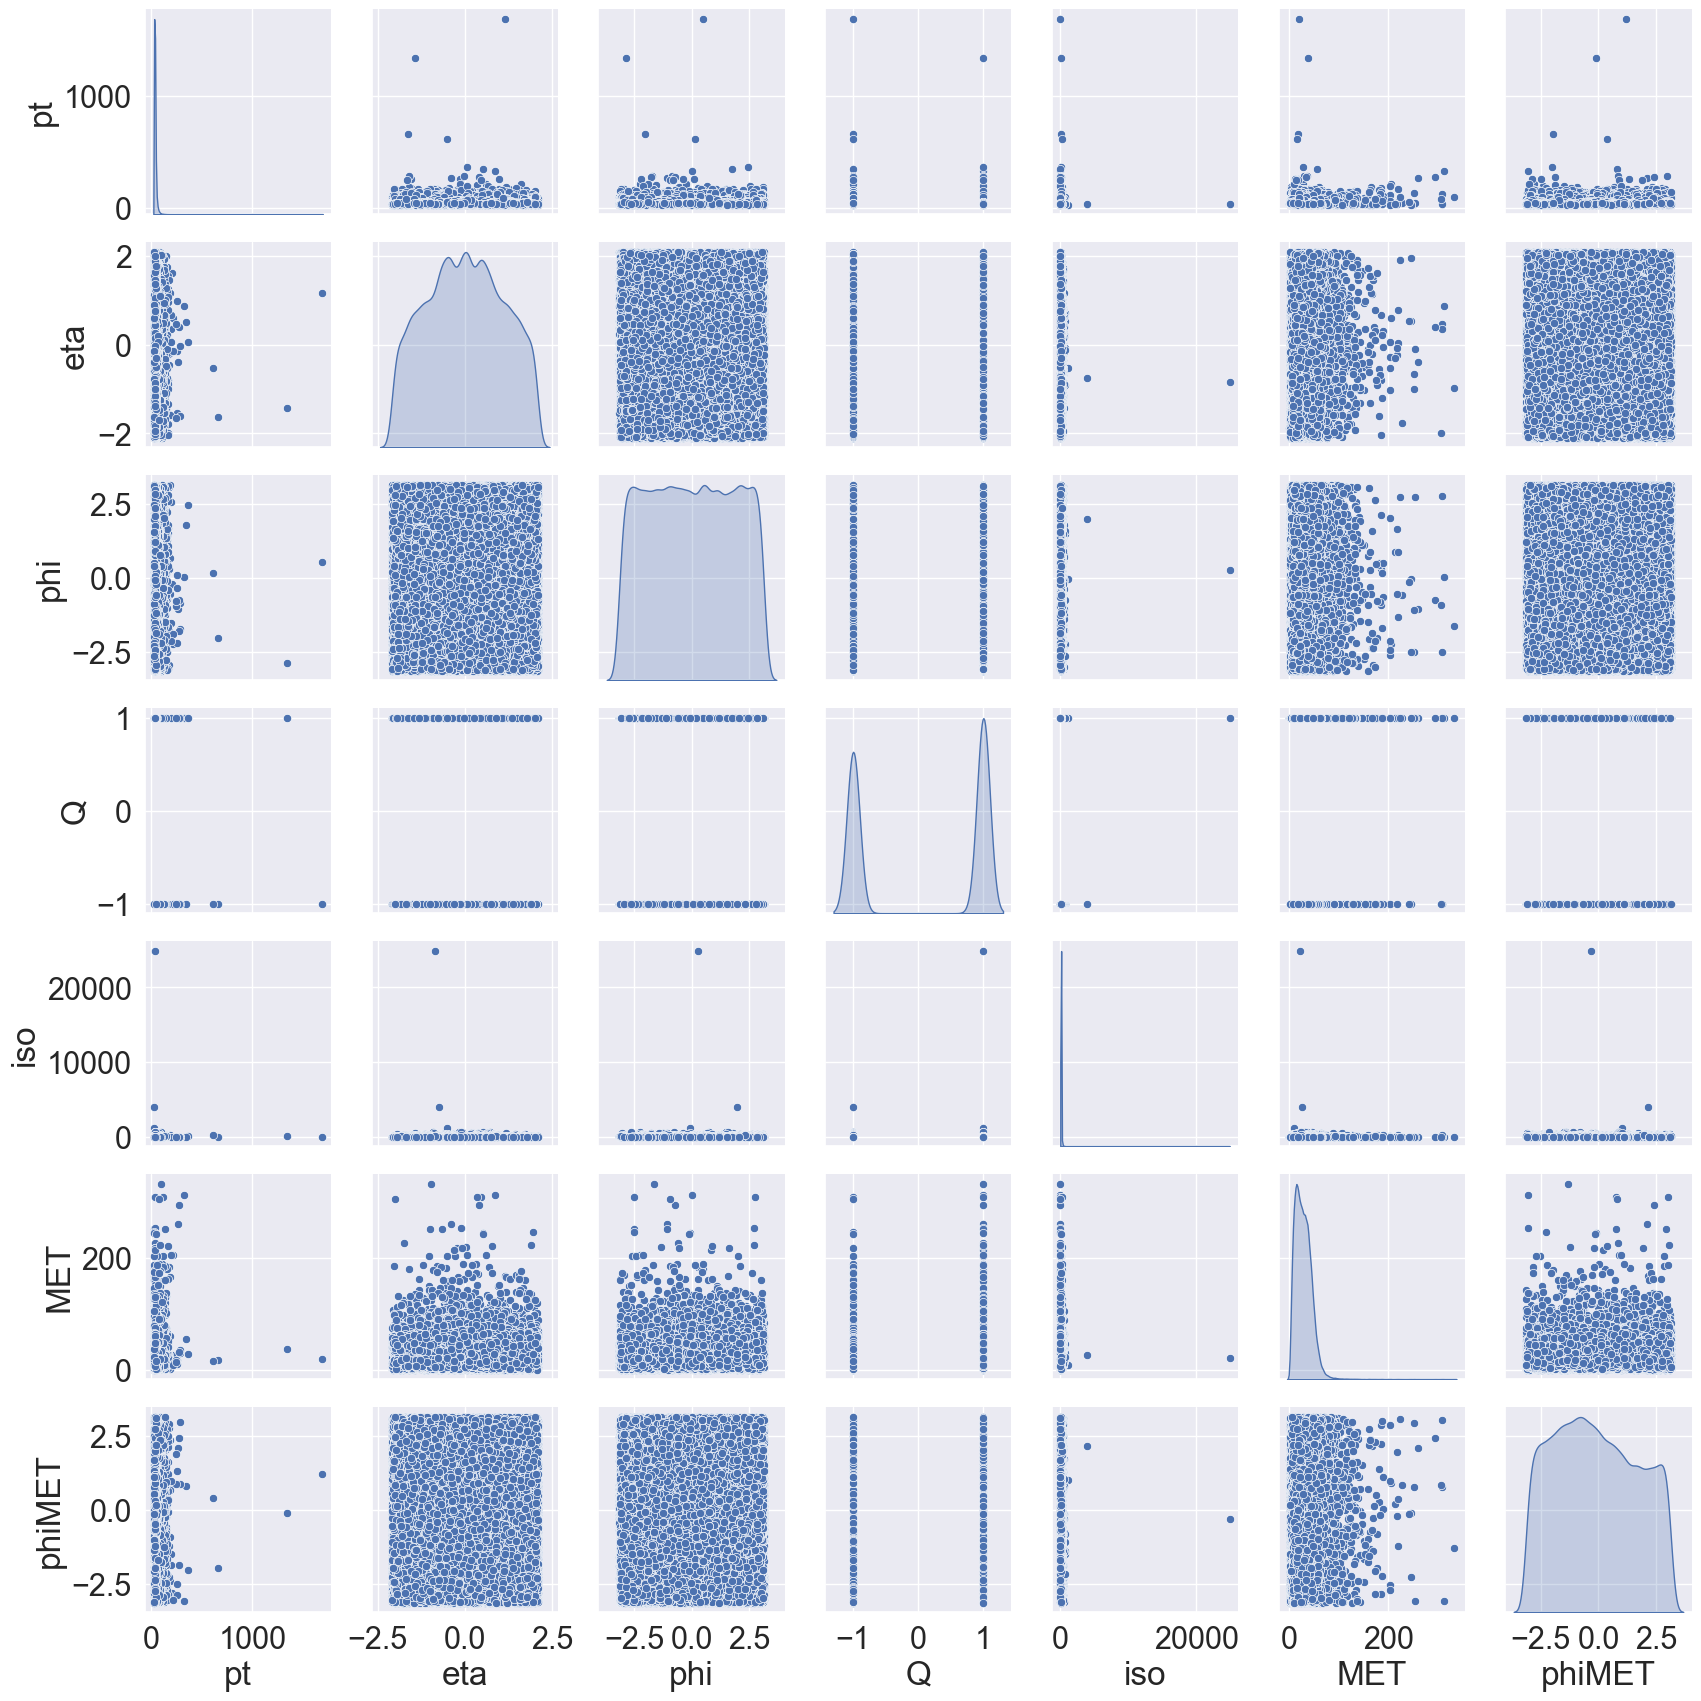

In [27]:
# aesthetics
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df_mu, diag_kind='kde') # kde serve per avere le distribuzioni di probabilità (credo?)

# Merging data

In [10]:
df = pd.concat([df_e,df_mu], ignore_index=True, sort=False)
df.sample(5)

pt     eta     phi  Q      iso      MET  phiMET class
159275  49.5662 -0.6858 -1.2793 -1   0.3565  36.1349  1.5980  munu
123226  37.2311  0.1728  2.8992  1   1.0490  41.4273 -0.2577  munu
29072   32.4709  2.2587 -1.5638  1   2.1153  27.3286 -1.6246   enu
161728  27.9429  1.2725 -0.4255 -1   1.7845  30.8842  2.2268  munu
178431  37.2276 -0.7514  0.9682  1  46.3145  12.6215 -1.5877  munu

In [11]:
del df_e, df_mu

## Data checks

<Axes: xlabel='class', ylabel='count'>

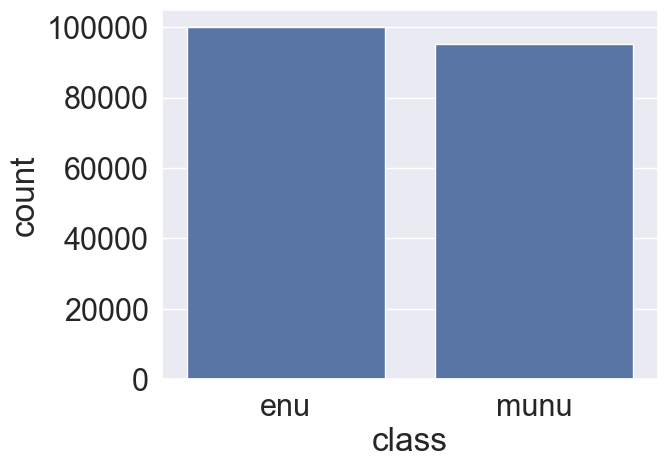

In [37]:
# Per verificare che il dataset sia bilanciato
sns.countplot(data=df,x='class')

<Figure size 2000x1000 with 0 Axes>

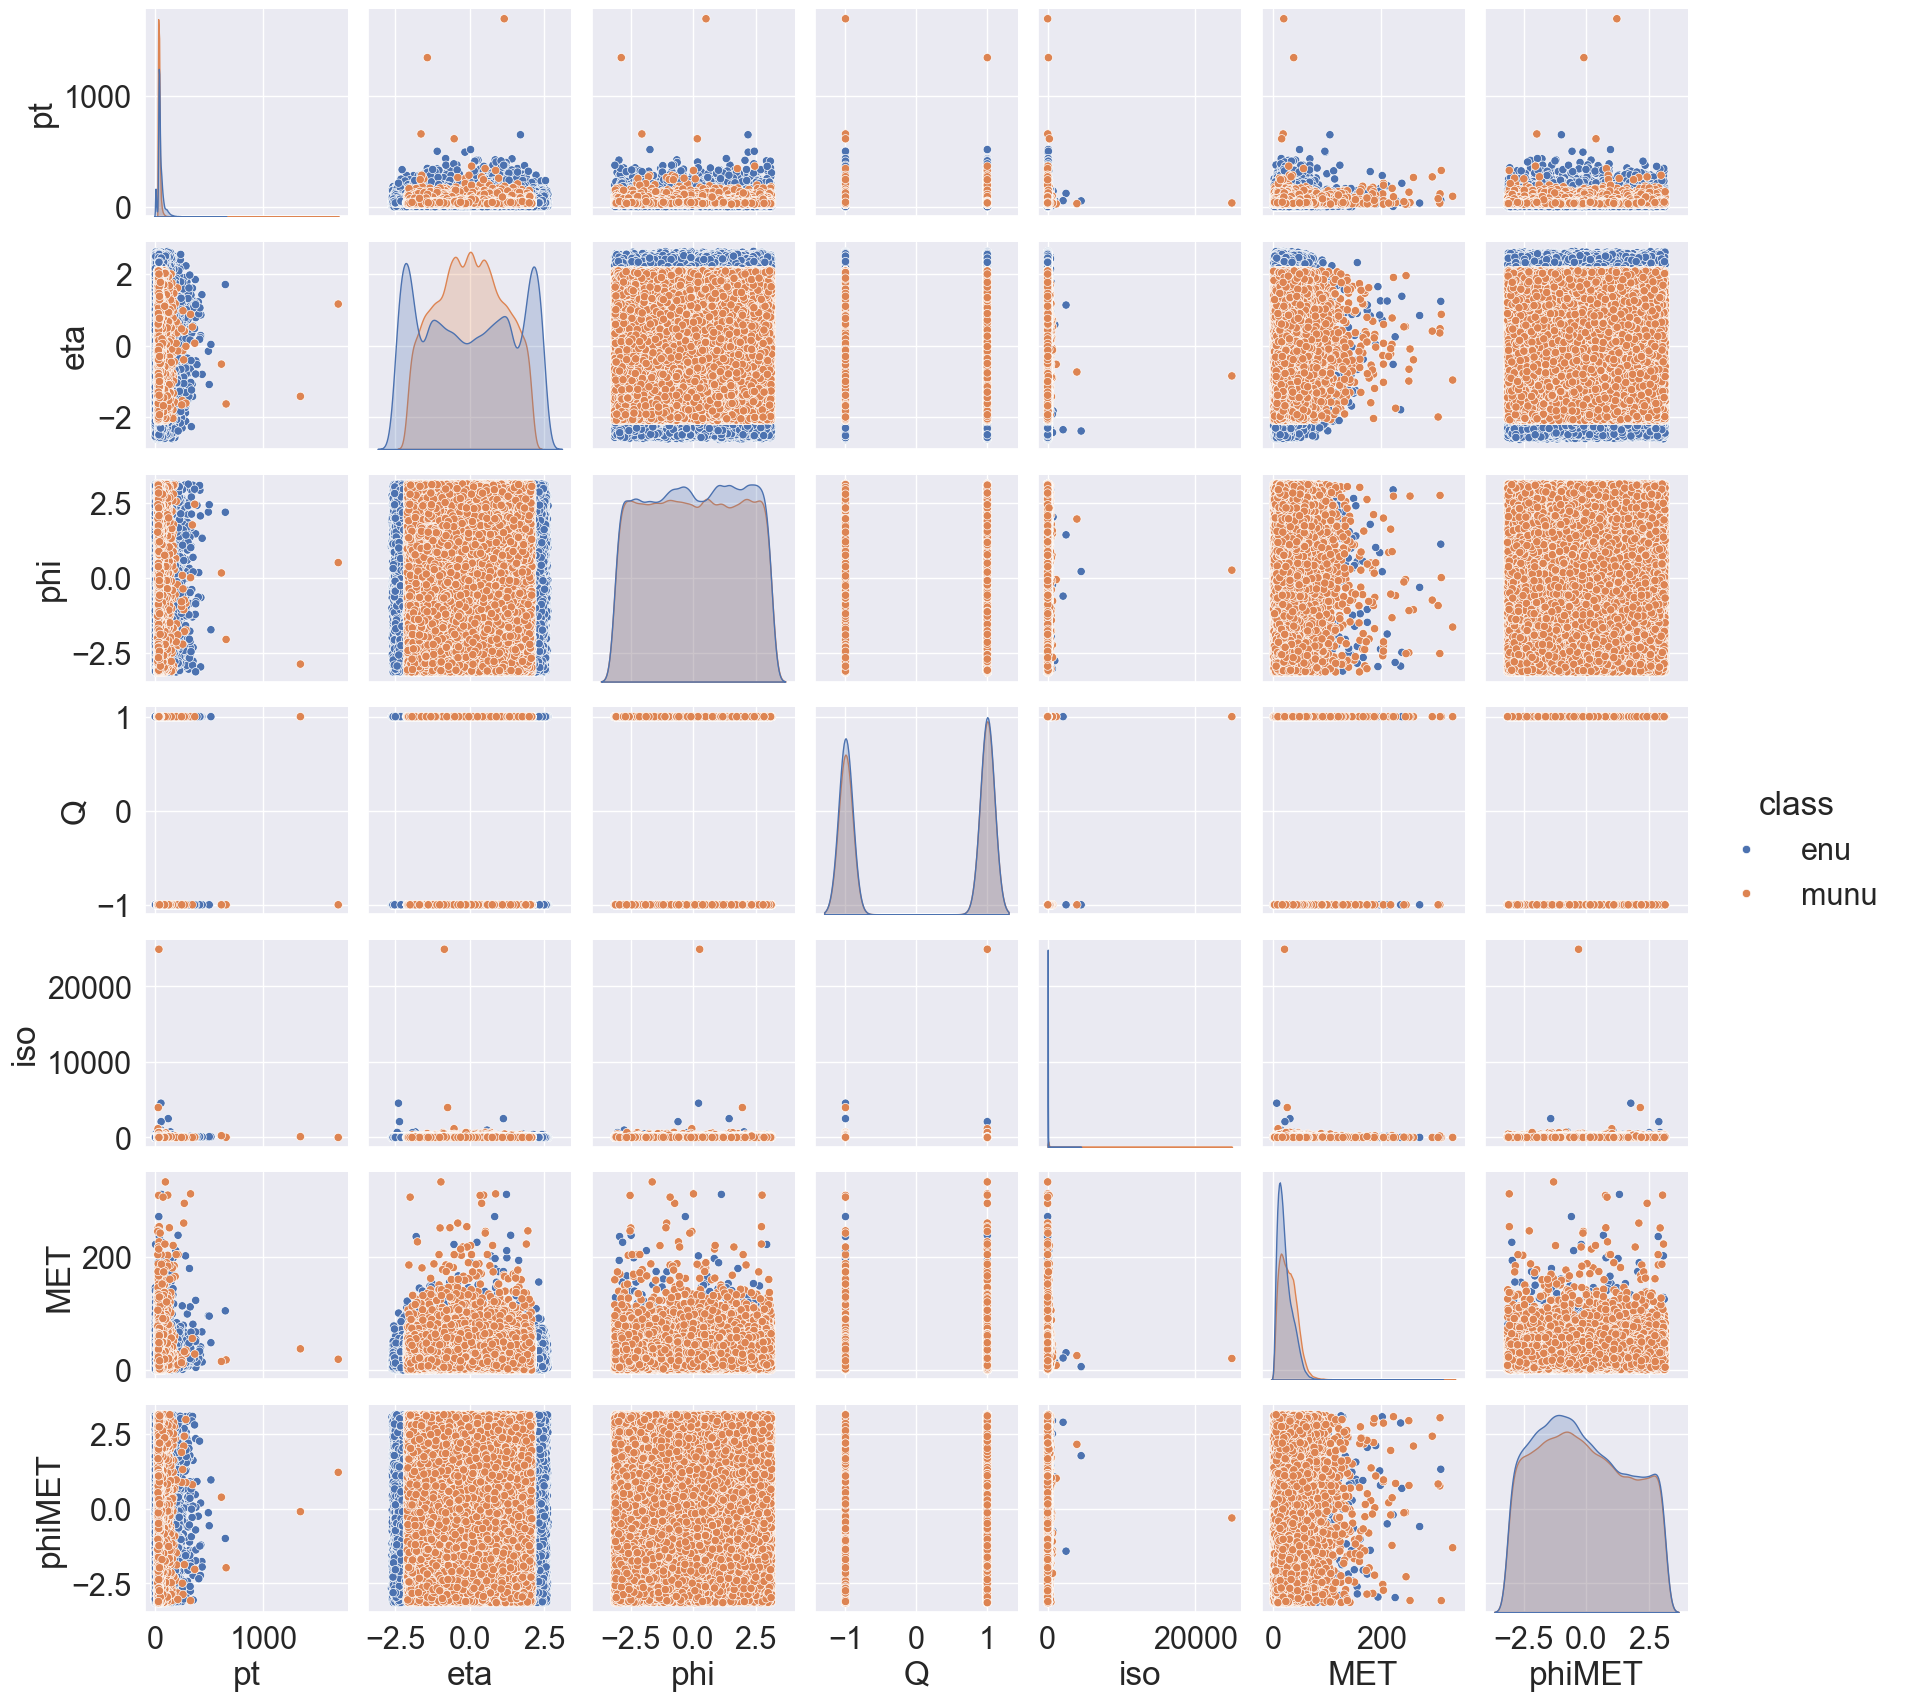

In [38]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
sns.pairplot(df, hue="class", palette="deep")

## Dataframes to *train&test* the model

In [12]:
# Drop unnecessary features
df.drop(['iso','Q'], inplace=True, axis=1)

# map class to int
df['class'] = df['class'].map({'enu': 0, 'munu': 1})

In [13]:
# split labels from data
X = df.drop(['class'], axis=1)
y = df['class']

del df

In [14]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # this outputs pandas

In [16]:
X_train.head(5)

pt     eta     phi      MET  phiMET
113147  33.4978  0.8993 -1.5531  18.5948 -1.6843
34029   28.4397 -0.9844  0.3626  11.0361  0.7729
184832  45.8711 -0.9208  1.2810  11.8654 -0.8906
83169   33.5682 -0.1798  0.4494  23.3605  1.8222
81435   41.1760 -2.1823  2.7081  47.2476 -0.4648

# Feature engineering
pké prendere i log? da guardare con calma ma su questo dovrei avere appunti

da guardare cosa faccia questa roba, dalla documentazione, da rivedere la feature engineering (dal notebook di appunti, ma cercare anche qlcosina dgli appunti)

In [15]:
X_train["log(pt)"] = X_train['pt'].apply(np.log1p) # questa roba qua fa ln(1 + x)
X_train["log(MET)"] = X_train['MET'].apply(np.log1p) 

X_train.drop(['pt','MET'], inplace=True, axis=1)
X_train.sample(5)

eta     phi  phiMET   log(pt)  log(MET)
107536 -0.6046  0.4528 -2.3078  3.396342  3.250967
15181  -2.0919 -0.2404  0.4128  4.630233  3.402523
27620  -2.4110 -0.3223 -1.2698  3.664256  2.940077
43343  -2.2459 -1.2499  1.9885  3.680477  3.491997
100356 -0.0935  0.5825 -3.1002  3.274878  3.680086

**Riscalamento** (trasformazione lineare dei dati sul range [-1,1])…

In [100]:
# Riscalamento dei dati (è trasformazione lineare) 
# scelgo il modo con cui voglio rimappare i dati (lo scaler), poi devo fornirgli le info di cui ha bisogno (il range finale, ma qlo lo faccio a priori ie indipendentemente dai dati e di default è -1,1; il range iniziale invece lo deve pescare necessariamente dai dati su cui lo voglio applicare e qsto lo si fa con `fit`) e poi devo applicarlo e qsto lo faccio con `transform`
scaler = preprocessing.MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train) # forse qsta roba qua è incompatibile con il modello (da provare)
X_test_scaler = scaler.transform(X_test)

… o **Normalizzazione** (mi porto a media 0 e varianza 1)

In [16]:
# Costruiamo il layer e informiamolo (ie ho solo 1 forma/STRUTTURA che adatto ai dati MA NN LO STO POPOLANDO!)
X_train_scaler = tf.keras.layers.Normalization(axis=-1) # axis=-1 gli dice come leggere il tensor ie in quale direz calcolare medie e varianze (qua banalmente se sle righe (axis=0) o sle colonne (axis=-1 o axis=1 fa li stès))
X_train_scaler.adapt(tf.convert_to_tensor(X_train)) # qua informiamo il layer sui dati, ie si calcola medie e varianze che userà poi

X_test_scaler = tf.keras.layers.Normalization(axis=-1)
X_test_scaler.adapt(tf.convert_to_tensor(X_test))

# Building and testing model

In [ ]:
def my_model():
   model = tf.keras.Sequential([
    X_train_scaler,
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)       
   ])
   model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
   return model

model = my_model()
history = model.fit(X_train, y_train, epochs=700, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.6089 - loss: 0.6756 - val_accuracy: 0.5091 - val_loss: 1.2356
Epoch 2/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.6993 - loss: 0.5735 - val_accuracy: 0.5097 - val_loss: 1.7937
Epoch 3/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7328 - loss: 0.5318 - val_accuracy: 0.5098 - val_loss: 2.4984
Epoch 4/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7337 - loss: 0.5256 - val_accuracy: 0.5098 - val_loss: 2.6252
Epoch 5/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7345 - loss: 0.5237 - val_accuracy: 0.5098 - val_loss: 2.7479
Epoch 6/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7377 - loss: 0.5200 - val_accuracy: 0.5098 - val_loss: 2.8366
Epoch 7/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.7370 - loss: 0.5177 - val_accuracy: 0.5098 - val_loss: 2.8326
Epoch 8/700
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 

## Performance check

1220/1220 - 0s - 308us/step - accuracy: 0.7543 - loss: 0.4774


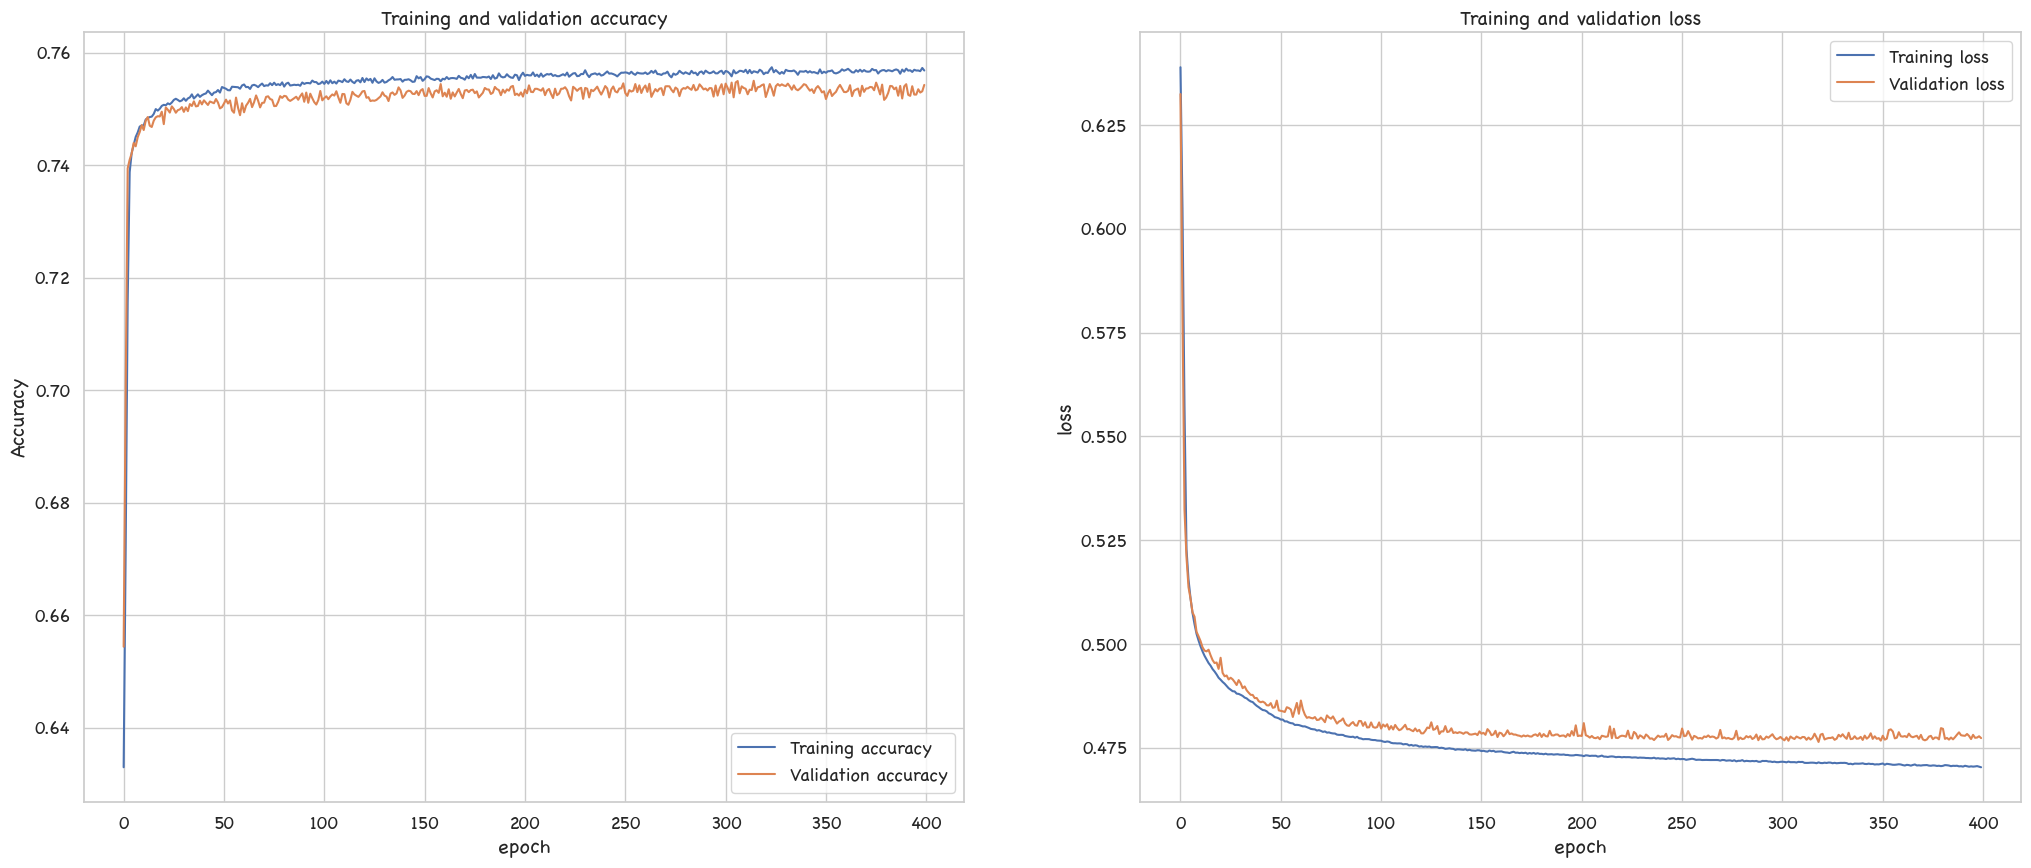

In [48]:
# aesthetics
font = {'family' : 'chalkboard',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

fig = plt.figure(figsize=(25,10))
ax1 = plt.subplot(121) # qsto sta per 1,2,1 ie nrows, ncol, index
ax2 = plt.subplot(122)

# what to plot on first figure (ax1)
ax1.plot(history.history['accuracy'], label='Training accuracy') # qua specifico cosa plottare (le y, le x sono implicite in history)
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 

ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

# what to plot on first figure (ax1)
ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')

ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')

#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [49]:
fig.savefig('400epochs.png')